In [1]:
# Code du reseau CNN
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.metrics import classification_report
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [3]:
#reshape data to fit model
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [4]:
#one-hot encode target column
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

In [5]:
#create model
model = Sequential()
#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

In [6]:
# compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
#train the model
epochs = 7
batch_size = 32
H = model.fit(trainX, trainY, validation_split=0.2, batch_size=batch_size, epochs=epochs)

Train on 48000 samples, validate on 12000 samples
Epoch 1/7
48000/48000 [==============================] - 96s 2ms/step - loss: 0.4655 - acc: 0.8322 - val_loss: 0.3271 - val_acc: 0.8828
Epoch 2/7
48000/48000 [==============================] - 104s 2ms/step - loss: 0.3232 - acc: 0.8814 - val_loss: 0.2829 - val_acc: 0.8947
Epoch 3/7
48000/48000 [==============================] - 114s 2ms/step - loss: 0.2789 - acc: 0.8979 - val_loss: 0.2652 - val_acc: 0.9038
Epoch 4/7
48000/48000 [==============================] - 104s 2ms/step - loss: 0.2518 - acc: 0.9081 - val_loss: 0.2429 - val_acc: 0.9136
Epoch 5/7
48000/48000 [==============================] - 113s 2ms/step - loss: 0.2314 - acc: 0.9150 - val_loss: 0.2259 - val_acc: 0.9187
Epoch 6/7
48000/48000 [==============================] - 92s 2ms/step - loss: 0.2112 - acc: 0.9222 - val_loss: 0.2249 - val_acc: 0.9171
Epoch 7/7
48000/48000 [==============================] - 96s 2ms/step - loss: 0.1954 - acc: 0.9271 - val_loss: 0.2329 - val_acc: 0

In [8]:
#predict test set
preds = model.predict(testX)

In [9]:
#initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]
#print report
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

         top       0.88      0.85      0.87      1000
     trouser       0.99      0.98      0.99      1000
    pullover       0.88      0.83      0.85      1000
       dress       0.91      0.90      0.91      1000
        coat       0.77      0.95      0.85      1000
      sandal       0.98      0.98      0.98      1000
       shirt       0.80      0.69      0.74      1000
     sneaker       0.96      0.96      0.96      1000
         bag       0.98      0.99      0.98      1000
  ankle boot       0.97      0.97      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



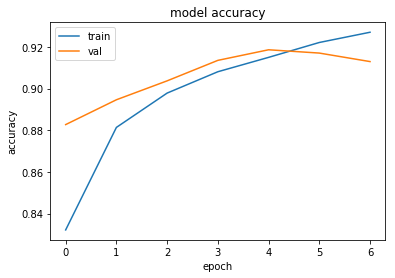

In [10]:
#summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('accuracy7.png')
plt.show()

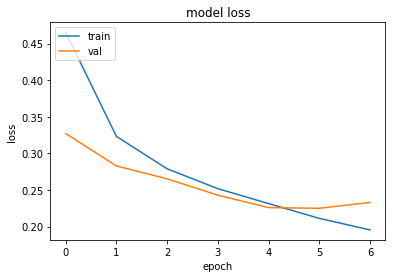

In [11]:
#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig('loss7.png')
plt.show()

In [12]:
# Code du reseau FCNN
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.utils import np_utils
from keras.optimizers import SGD
from keras import backend as K
import matplotlib.pyplot as plt

In [13]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

In [14]:
trainX = trainX.reshape((trainX.shape[0], 28**2))
testX = testX.reshape((testX.shape[0], 28**2))

# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
 
# one-hot encode the training and testing labels
trainY = np_utils.to_categorical(trainY, 10)
testY = np_utils.to_categorical(testY, 10)
 
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [15]:
model = Sequential()
# f_activation = "sigmoid"
# f_activation = "softmax"
# f_activation = "selu"
f_activation = "relu"

model.add(Dense(512,input_shape=(784,)))
model.add(Activation(f_activation))

model.add(Dense(256,input_shape=(512,)))
model.add(Activation(f_activation))

model.add(Dense(128,input_shape=(256,)))
model.add(Activation(f_activation))

model.add(Dense(64,input_shape=(128,)))
model.add(Activation(f_activation))

model.add(Dense(32,input_shape=(64,)))
model.add(Activation(f_activation))

model.add(Dense(10,input_shape=(32,)))
model.add(Activation("softmax"))

# model.add(Dense(655,input_shape=(784,)))
# model.add(Activation(f_activation))

# model.add(Dense(526,input_shape=(655,)))
# model.add(Activation(f_activation))

# model.add(Dense(397,input_shape=(526,)))
# model.add(Activation(f_activation))

# model.add(Dense(268,input_shape=(397,)))
# model.add(Activation(f_activation))

# model.add(Dense(139,input_shape=(268,)))
# model.add(Activation(f_activation))

# model.add(Dense(10,input_shape=(139,)))
# model.add(Activation("softmax"))

In [16]:
epochs = 7
learning_rate = 1e-2
batch_size = 32

In [17]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [18]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), batch_size=batch_size, epochs=epochs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 19s 313us/step - loss: 0.5289 - acc: 0.8089 - val_loss: 0.4127 - val_acc: 0.8487
Epoch 2/7
60000/60000 [==============================] - 16s 264us/step - loss: 0.3587 - acc: 0.8688 - val_loss: 0.3908 - val_acc: 0.8548
Epoch 3/7
60000/60000 [==============================] - 16s 263us/step - loss: 0.3242 - acc: 0.8816 - val_loss: 0.3543 - val_acc: 0.8694
Epoch 4/7
60000/60000 [==============================] - 16s 263us/step - loss: 0.3020 - acc: 0.8888 - val_loss: 0.3540 - val_acc: 0.8705
Epoch 5/7
60000/60000 [==============================] - 16s 262us/step - loss: 0.2875 - acc: 0.8939 - val_loss: 0.3429 - val_acc: 0.8724
Epoch 6/7
60000/60000 [==============================] - 16s 264us/step - loss: 0.2762 - acc: 0.8973 - val_loss: 0.3442 - val_acc: 0.8756
Epoch 7/7
60000/60000 [==============================] - 16s 264us/step - loss: 0.2662 - acc: 0.9022 - val_loss: 0.3370 - 

In [19]:
preds = model.predict(testX)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(testY.argmax(axis=1), preds.argmax(axis=1), target_names=labelNames))

              precision    recall  f1-score   support

         top       0.81      0.84      0.83      1000
     trouser       0.99      0.96      0.98      1000
    pullover       0.79      0.77      0.78      1000
       dress       0.87      0.90      0.88      1000
        coat       0.80      0.80      0.80      1000
      sandal       0.96      0.95      0.96      1000
       shirt       0.68      0.67      0.68      1000
     sneaker       0.92      0.97      0.94      1000
         bag       0.97      0.97      0.97      1000
  ankle boot       0.97      0.94      0.96      1000

   micro avg       0.88      0.88      0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



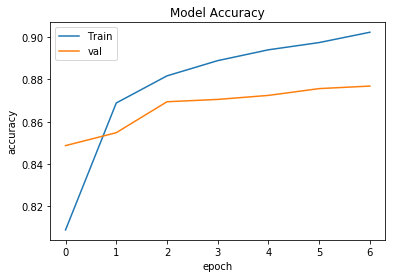

In [21]:
#summarize history for accuracy
plt.plot(H.history['acc'])
plt.plot(H.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.savefig('accuracy2.eps')
plt.show()

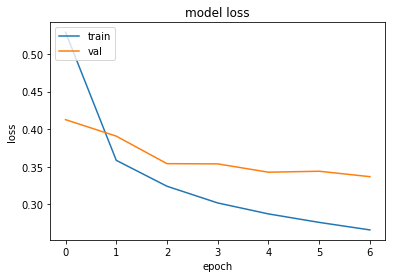

In [22]:
#summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('loss2.eps')
plt.show()